In [1]:
import numpy as np
import pandas as pd
import json
import nltk

import matplotlib.pyplot as plt
import requests
import urllib.request

%matplotlib inline

In [2]:
#data sourced from http://jmcauley.ucsd.edu/data/amazon/
#let's examine how a json file looks!

with urllib.request.urlopen('https://graderdata.s3.amazonaws.com/reviews_Pet_Supplies_5.json') as f:
    data = f.readlines()
    data = [json.loads(line) for line in data]
    
data

[{'reviewerID': 'A14CK12J7C7JRK',
  'asin': '1223000893',
  'reviewerName': 'Consumer in NorCal',
  'helpful': [0, 0],
  'reviewText': "I purchased the Trilogy with hoping my two cats, age 3 and 5 would be interested.  The 3 yr old cat was fascinated for about 15 minutes but when the same pictures came on, she got bored.  The 5 year old watched for about a few minutes but then walked away. It is possible that because we have a wonderful courtyard full of greenery and trees and one of my neighbors has a bird feeder, that there is enough going on outside that they prefer real life versus a taped version.  I will more than likely pass this on to a friend who has cats that don't have as much wildlife to watch as mine do.",
  'overall': 3.0,
  'summary': 'Nice Distraction for my cats for about 15 minutes',
  'unixReviewTime': 1294790400,
  'reviewTime': '01 12, 2011'},
 {'reviewerID': 'A39QHP5WLON5HV',
  'asin': '1223000893',
  'reviewerName': 'Melodee Placial',
  'helpful': [0, 0],
  'revi

In [3]:
df = pd.read_json('https://graderdata.s3.amazonaws.com/reviews_Pet_Supplies_5.json', lines=True)
#lines = True is for parsing more than one block of data from your json

In [4]:
df.shape

(157836, 9)

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011"
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5,Entertaining for my cats,1379116800,"09 14, 2013"
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4,Entertaining,1355875200,"12 19, 2012"
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4,Happy to have them,1305158400,"05 12, 2011"
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3,You really only need vol 2,1330905600,"03 5, 2012"


In [6]:
df.sample(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
87779,A3QCCG9OME82AW,B0024EACFS,Forlornmyth,"[10, 11]","While my cats love the tube, I was disappointe...",3,the size advertised is not the actual size,1297641600,"02 14, 2011"
43601,A1M0C4ESDFGCJP,B000FUOD5I,Christie,"[0, 0]",The toothpaste is good but I bought this mainl...,4,Great idea but the bristles are a little too h...,1378684800,"09 9, 2013"
133978,AYFW47AXYC1C,B005V0RAES,James B. Beavan III,"[0, 0]","Awesome price, so you might as well bulk up on...",4,great price,1342137600,"07 13, 2012"
23375,A1O93BTMOB94WO,B0002WPTZ2,Cheryl Adams,"[0, 0]",we really need this because we love our cats a...,4,cat flea treatment,1386979200,"12 14, 2013"
50253,A1FJMNMB6D683U,B000L3XYZ4,Amanda,"[0, 0]",We bought this so the cat would stop drinking ...,4,Great for cat who likes running water,1318723200,"10 16, 2011"


In [7]:
#First there seems to be some "default tags", let's see how many of those exists in our data sets

df[df['reviewerName'].str.contains('Consumer')]

#notice one issue commonly encountered

ValueError: cannot mask with array containing NA / NaN values

In [8]:
#to fix it

consumer_df = df[df['reviewerName'].str.contains('Consumer', na=False)]
consumer_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011"
66,A14CK12J7C7JRK,B00005MF9U,Consumer in NorCal,"[0, 0]",I found out about these litterboxes by going i...,2,Breaks too easily and motor is weak and noisy,1274054400,"05 17, 2010"
6004,AYOMAHLWRQHUG,B000256DEU,Conspicuous Consumer,"[0, 0]",When my first bendable bubble wand broke after...,5,The Best of the Alternatives,1360454400,"02 10, 2013"
6890,AYOMAHLWRQHUG,B00025Z6FW,Conspicuous Consumer,"[2, 2]",I have a tank full of multi-sized cichlids tha...,5,Perfect for My Big Red Parrot Fish,1373241600,"07 8, 2013"
8667,A1YXCQHKK6XF4Y,B0002APQ70,"N. Ro ""Consumer Awareness Advocate""","[0, 0]",This works great on throw-up stains. Thank goo...,5,The BEST - I need to order the gallon size!,1337644800,"05 22, 2012"
...,...,...,...,...,...,...,...,...,...
156544,A3SDBL8SJC2ME3,B00I18UVSO,"Typical Consumer ""AGN""","[1, 1]",The dogs absolutely love these. Also they are ...,5,Our dogs love these treats,1403481600,"06 23, 2014"
157190,A3SDBL8SJC2ME3,B00IK5V7ZE,"Typical Consumer ""AGN""","[0, 0]",Our dog loves the taste (although she's a bit ...,5,Our dog loves the taste (although she's a bit ...,1405382400,"07 15, 2014"
157202,A3OXRFCJI67IMN,B00INTTDQC,Bold Consumer,"[4, 4]",The size is just right for my medium-sized dog...,5,These are Great! I will be ordering more today...,1397952000,"04 20, 2014"
157251,A3OXRFCJI67IMN,B00INTTDQW,Bold Consumer,"[2, 3]",Taking my dog in to the vet to have his teeth ...,5,These are a Favorite Treat for My Dog - and Hi...,1403136000,"06 19, 2014"


- When it comes to review data, generally there wil be skewness and other potential issues, let's evaluate to see if it's true here

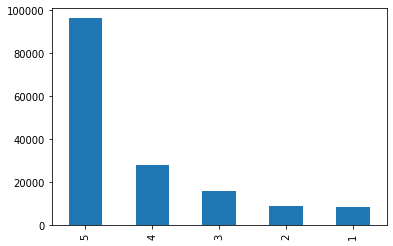

In [9]:
df.overall.astype('str').value_counts().plot(kind='bar')

- Let's evaluate what might be the most frequent words observed in 5's as it's by far our most popular rating. We'll combine a few steps at once here.

- First we'll create a mask for our data frame. Then we'll lower case all the string text found within our review as well as join all our text into a single long string to form what's known as a "corpus".

In [10]:
best_rev_corpus = ' '.join(df[df['overall']==5]['reviewText']).lower()

- Now let's introduce some tools that will assist us with counting our most frequent words (tokens).

In [11]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [12]:
lemmatizer= WordNetLemmatizer()

In [13]:
stop_filters = stopwords.words('english') + list(string.punctuation)

In [14]:
best_rev_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(best_rev_corpus) if tokens not in stop_filters]

fdist = FreqDist(best_rev_tokens)
fdist.most_common(50)

[('dog', 76304),
 ('cat', 54999),
 ("n't", 50497),
 ("'s", 49667),
 ('one', 43971),
 ('love', 42580),
 ('like', 34545),
 ('get', 29745),
 ('food', 29581),
 ('great', 26977),
 ('toy', 24578),
 ('would', 23356),
 ('product', 23304),
 ('use', 21271),
 ('time', 21176),
 ('well', 20187),
 ('good', 19342),
 ('treat', 18018),
 ('work', 17388),
 ('little', 17304),
 ('much', 16649),
 ('really', 16588),
 ('also', 15794),
 ('...', 15608),
 ('keep', 14503),
 ('two', 14215),
 ('day', 14169),
 ('make', 13462),
 ('water', 13170),
 ('easy', 13136),
 ('even', 12993),
 ('litter', 12917),
 ('year', 12825),
 ("'ve", 12568),
 ('go', 12398),
 ('put', 11898),
 ('small', 11700),
 ('bought', 11613),
 ('34', 11337),
 ('around', 11335),
 ('box', 11167),
 ('used', 11003),
 ('size', 10986),
 ('still', 10977),
 ('bag', 10856),
 ('recommend', 10671),
 ('pet', 10503),
 ('got', 10392),
 ('thing', 10276),
 ('month', 10150)]

**Next steps:**

- So we see here that there's still some tokens that are not very helpful. While you may be interested in how often dog and cat appears, it's unlikely that we can attribute those tokens to the five star reviews. Since this will be an iterative process, it makes sense for us to create a function that will filter for us.

In [15]:
## note this uses word_tokenize from nltk

def extra_filter(corpus, stop_tokens):
    '''
    corpus: string format of text data
    stop_tokens: list of tokens you wish to add to stopwords filter
    '''
    from nltk.tokenize import word_tokenize
    
    stop_filters = stopwords.words('english') + list(string.punctuation) + stop_tokens
    filtered_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus) 
                       if tokens not in stop_filters]
    return filtered_tokens

In [16]:
extra_stopwords = ["n't", "'s", 'dog', 'cat', '...' ,"''", "'m", '``', '--', 'pet']

best_rev_new_toks = extra_filter(corpus= best_rev_corpus, stop_tokens=extra_stopwords)

In [17]:
fdist = FreqDist(best_rev_new_toks)
fdist.most_common(50)

[('one', 43971),
 ('love', 42580),
 ('like', 34545),
 ('get', 29745),
 ('food', 29581),
 ('dog', 27091),
 ('great', 26977),
 ('cat', 25213),
 ('toy', 24578),
 ('would', 23356),
 ('product', 23304),
 ('use', 21271),
 ('time', 21176),
 ('well', 20187),
 ('good', 19342),
 ('treat', 18018),
 ('work', 17388),
 ('little', 17304),
 ('much', 16649),
 ('really', 16588),
 ('also', 15794),
 ('keep', 14503),
 ('two', 14215),
 ('day', 14169),
 ('make', 13462),
 ('water', 13170),
 ('easy', 13136),
 ('even', 12993),
 ('litter', 12917),
 ('year', 12825),
 ("'ve", 12568),
 ('go', 12398),
 ('put', 11898),
 ('small', 11700),
 ('bought', 11613),
 ('34', 11337),
 ('around', 11335),
 ('box', 11167),
 ('used', 11003),
 ('size', 10986),
 ('still', 10977),
 ('bag', 10856),
 ('recommend', 10671),
 ('got', 10392),
 ('thing', 10276),
 ('month', 10150),
 ('price', 10018),
 ('old', 9774),
 ('buy', 9687),
 ('puppy', 9508)]



We can also use the Frequency Distribution object to look at frequencies of specific words. For example, I may be interested in if a particular word such as "safe" is often used. This is because we can see that the FreqDist stores the words as keys and the occurances as values in a dictionary like format.

In [18]:
issubclass(FreqDist, dict)

True

In [19]:
fdist.keys()

dict_keys(['usually', 'one', 'cat', 'watching', 'tv', 'staying', 'trouble', 'dvd', 'playing', 'seem', 'like', 'mouse', 'bird', 'maybe', 'go', 'little', 'le', 'stir', 'crazy', 'inside', 'time', 'rottie', 'food', 'allergy', 'poultry', 'beef', 'dairy', "'ve", 'difficult', 'finding', 'toothpaste', 'make', 'allergic', 'enjoys', 'taste', 'peanut', 'flavor', 'smell', 'black', 'licorice', 'love', 'wiggle', 'much', 'brush', 'teeth', 'every', 'night', 'price', 'ok', 'wish', 'tube', 'came', 'larger', 'size', 'soooo', 'pup', 'his/her', 'current', 'might', 'want', 'try', 'puppy', 'stuff', 'tail', 'start', 'wagging', 'soon', 'ask', 'ready', 'actually', 'enjoyable', 'daily', 'experience', 'definitely', '34', 'work', 'great', 'hate', 'gum', 'health', 'important', 'pearly', 'white', 'yes', 'princess', 'enjoying', 'showing', 'getting', 'best/top', 'result', '..', 'strongly', 'recommended', 'without', 'regret', 'product', 'well', 'used', 'consistently', 'four', 'dog', 'habit', 'happy', 'holder', 'heath',

In [20]:
fdist['safe']

1998

**Side note**

We can also look at words that only *once* from this text. These are known in linguistics as **hapaxes**.

These can be examined by calling upon the hapaxes method from the object.

In [21]:
fdist.hapaxes()

['best/top',
 's-1-8',
 'hang.it',
 'seed.their',
 'cosaminds',
 '100degrees',
 'excellentthe',
 'goodquailty',
 'bottlewill',
 'againthe',
 'mgf',
 'furmomma',
 'dorr',
 'then.after',
 'non-lite',
 'alternative.the',
 'it.recently',
 'bag.being',
 'cat.oh',
 'itself.update',
 '10/3/10i',
 'trooper.i',
 'trackless/lite',
 'lm500',
 '7-3/4',
 'own4',
 'points.this',
 'true.with',
 'century.some',
 'necessary.spray',
 'smoother.do',
 'even.keep',
 'issue.forget',
 'tent.if',
 'proposition.keep',
 'ofthose',
 'reducedjust',
 'often.with',
 'itself.any',
 'littlebaking',
 'receptcle',
 'yourpets',
 'annoying.as',
 'peritonitis',
 'infection.she',
 'feces.with',
 'handrag',
 'further.you',
 'lm9000',
 'lme9000',
 'moronic',
 'standards.my',
 'qc',
 'update:11/25/2008',
 'a+++++i',
 'before..about',
 'suggestion..bad',
 'though.so',
 'turnkey',
 'skid-dish',
 'business.some',
 'euthanized.i',
 'kickied',
 'rt',
 'beliongs',
 'rcomend',
 'litter-maids',
 'littermaid.no',
 'food-no',
 "'bleach

- The results from our frequency distribution are better but we may still be missing some of the context of what people are talking about. The issue is, we're currently examining strictly tokens in isolation, but what if we can capture some of the context behind each token?

- One method to do so is by extracting bigrams instead of individual words (unigrams).

In [22]:
best_rev_bigram = list(nltk.bigrams(best_rev_tokens))

In [23]:
fdist_bi = FreqDist(best_rev_bigram)
fdist_bi.most_common(50)

[(('dog', 'love'), 6812),
 (('ca', "n't"), 5670),
 (('cat', 'love'), 4885),
 (('dog', 'food'), 4229),
 (('highly', 'recommend'), 4057),
 (('litter', 'box'), 3916),
 (('year', 'old'), 3343),
 (('dog', "'s"), 3240),
 (('work', 'great'), 2962),
 (('wo', "n't"), 2748),
 (('work', 'well'), 2686),
 (('cat', 'food'), 2465),
 (('great', 'product'), 2278),
 (('would', 'recommend'), 2169),
 (('long', 'time'), 1974),
 (("n't", 'get'), 1964),
 (('well', 'made'), 1941),
 (('pet', 'store'), 1939),
 (('would', "n't"), 1912),
 (('one', 'cat'), 1901),
 (('really', 'like'), 1835),
 (('make', 'sure'), 1745),
 (('--', '--'), 1728),
 (('love', 'toy'), 1710),
 (('small', 'dog'), 1698),
 (('month', 'old'), 1689),
 (('could', "n't"), 1654),
 (('much', 'better'), 1645),
 (("n't", 'know'), 1643),
 (('every', 'day'), 1623),
 (('dry', 'food'), 1586),
 (("n't", 'like'), 1582),
 (('dog', 'like'), 1544),
 (('dog', "n't"), 1512),
 (('last', 'long'), 1498),
 (('easy', 'clean'), 1476),
 (('even', 'though'), 1460),
 (('

- So already just from examining this list, we can see some potential comments rise towards the top namely that products where the animal seem to enjoy them influences a good nature of the five star reviews. In addition, other traits such as easy to use for the owner also factor in.


Much like prior, we can examine if a given bi-gram exists within our dataset. The brand I shop for is "Science Diet" and I may be interested in seeing whether this particular brand was mentioned in our dataset.

In [24]:
fdist_bi[('science', 'diet')]

403

It seems there are comments that mention this particular brand. Let's see if we can examine what're terms commonly used in the specific reviews that reference it. We will combined what we learned prior to create two filters that pairs down to reviews that are five stars and mentions the relevant brand in their review text.

In [25]:
sciencediet_df = df[df['reviewText'].str.contains('Science Diet', na=False)]
sciencediet_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
833,A2V9DTXTQ5YIMK,B000084DWM,"A. Hudson ""bisou bisou""","[1, 1]",I used to only buy Science Diet. Knowing my el...,2,Nine different cats and none of them like it,1390262400,"01 21, 2014"
837,A3AGTCQ1OYJGIP,B000084DWM,"BK BAZHE ""writer, poet, & artist.""","[0, 0]","Science Diet, I use for many years. My Cat is ...",5,Great food for cats.,1405036800,"07 11, 2014"
839,A3R17B6UX466U5,B000084DWM,Bruce S.,"[3, 3]",This cat food contains a lower level of magnes...,5,Low magnesium levels are worth the extra cost.,1391558400,"02 5, 2014"
841,A334SPS816A2GG,B000084DWM,D. Butler,"[0, 0]","My two cats age 5 and 18, yes, 18 love this fo...",5,Favorite flavor of both of my Siamese cats age...,1385078400,"11 22, 2013"
842,A2PBXA17MGI716,B000084DWM,"D. Grubb ""ddnwvfan""","[0, 0]",Both my cats love Hills Science Diet food! It...,5,Love,1399766400,"05 11, 2014"
...,...,...,...,...,...,...,...,...,...
156731,A342PAZ5NSQRM3,B00IDZTGIG,Amazon Customer,"[0, 0]",I like the natural ingredients which are healt...,4,Healthy food for your adult cat,1398902400,"05 1, 2014"
156736,A2D7B5I7ZQ51XL,B00IDZTGIG,Anthony Pittore,"[0, 0]",There are two requirements for pet food: High-...,3,"High-quality, but my cats don't like it",1400112000,"05 15, 2014"
156784,ATLA5CJH0ZZHP,B00IDZTGIG,Terry R. Nye,"[0, 0]",We have five cats and all enjoy snacking on dr...,4,high-quality dry food; extremely expensive,1398729600,"04 29, 2014"
156856,A3TP31S61PPE3G,B00IDZTGMM,AlexJouJou,"[1, 1]",Frankly my Genny is very picky with her food. ...,5,This IS the Cat's Meow!,1397433600,"04 14, 2014"


In [26]:
best_sd_reviews = ' '.join(sciencediet_df[sciencediet_df['overall']==5]['reviewText']).lower()
best_science_tokens = extra_filter(corpus= best_sd_reviews, stop_tokens=extra_stopwords)

fdist_sci_diet = FreqDist(best_science_tokens)

In [27]:
fdist_sci_diet.most_common(50)

[('food', 1189),
 ('diet', 424),
 ('science', 347),
 ('cat', 284),
 ('like', 244),
 ('one', 226),
 ('dry', 190),
 ('love', 146),
 ('good', 138),
 ('grain', 136),
 ('get', 135),
 ('eat', 135),
 ('bag', 126),
 ('dog', 126),
 ('year', 121),
 ('would', 121),
 ('vet', 120),
 ('much', 120),
 ('product', 113),
 ('feed', 109),
 ('also', 107),
 ('brand', 106),
 ('hill', 106),
 ('ingredient', 106),
 ('time', 104),
 ('canned', 99),
 ('old', 98),
 ('day', 98),
 ('two', 93),
 ('free', 93),
 ('even', 88),
 ('tried', 85),
 ('chicken', 84),
 ('first', 84),
 ('kibble', 80),
 ('34', 79),
 ('little', 79),
 ('give', 79),
 ('eating', 79),
 ("'ve", 78),
 ('well', 77),
 ('problem', 77),
 ('since', 76),
 ('le', 76),
 ('new', 76),
 ('price', 74),
 ('really', 73),
 ('make', 71),
 ('month', 68),
 ('blue', 67)]

This object also has a built in plotting method where we can look at the frequency distribution visually.

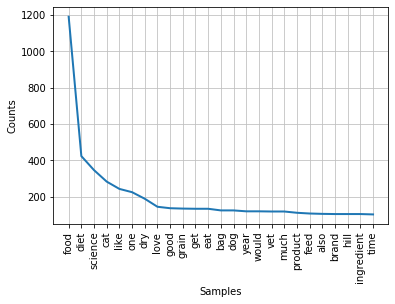

In [28]:
fdist_sci_diet.plot(25)

Alternatively we can look at it as a bar graph. Here we remove "food" because it was by far the most common token and making our visualization less useful due to it's count.

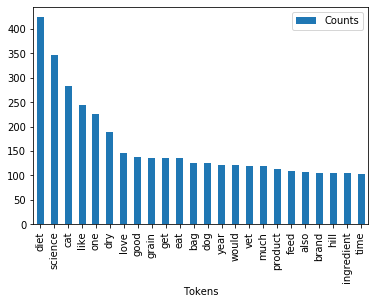

In [29]:
pd.DataFrame(fdist_sci_diet.most_common(25)[1:], columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='bar')



- We can do additional iterations to filter out excess "obvious" factors but we will leave that direction for additional future work.

- Instead, let's examine a different library that can also replicate our desired effect of examining most frequent bigrams.

- Ie. different tools for similar effect.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cnt_vec = CountVectorizer(ngram_range=(2,2), stop_words='english',max_features=50)

In [32]:
cnt_vec.fit_transform(df[df['overall']==5]['reviewText'])

<96253x50 sparse matrix of type '<class 'numpy.int64'>'
	with 68167 stored elements in Compressed Sparse Row format>

In [33]:
cnt_vec.get_feature_names()

['cat food',
 'cat litter',
 'cat loves',
 'cats like',
 'cats love',
 'decided try',
 'definitely recommend',
 'dog food',
 'dog loves',
 'dogs like',
 'dogs love',
 'don know',
 'dry food',
 'easy clean',
 'easy use',
 'german shepherd',
 'good quality',
 'grain free',
 'great price',
 'great product',
 'high quality',
 'highly recommend',
 'highly recommended',
 'just fine',
 'just like',
 'just right',
 'litter box',
 'litter boxes',
 'little bit',
 'long time',
 'looks like',
 'loves toy',
 'make sure',
 'month old',
 'peanut butter',
 'perfect size',
 'pet store',
 'puppy loves',
 'really like',
 'recommend product',
 'right away',
 'small dog',
 'small dogs',
 've tried',
 've used',
 'wet food',
 'works great',
 'year old',
 'years ago',
 'years old']

- Now let's tie this together with other topics we've learned from Data Analysis. For example, suppose, we're interested in the top 5 terms and their frequencies of each of the review ratings.

In [34]:
#First we create the groups into groupby objects

rev_groups = df.groupby('overall')

In [35]:
#next let's build a function that we can apply aggregated to our groups

def freq_analysis(txt, stop_tokens=extra_stopwords, num =50):
    txt = ' '.join(txt).lower()
    stop_filters = stopwords.words('english') + list(string.punctuation) + stop_tokens
    filtered_tokens = [tokens for tokens in word_tokenize(txt) 
                       if tokens not in stop_filters]
    
    return filtered_tokens
    fdist = FreqDist(filtered_tokens)
    return fdist.most_common(num)


In [36]:
rev_top50 = rev_groups.agg({'reviewText' : freq_analysis})

In [37]:
pd.set_option('display.max_colwidth', None)

rev_top50

,reviewText
overall,
1,"[product, work, dogs, smell, difficult, put, smelled, like, christmas, candy, cane, gone, wrong, put, front, dry, food, 've, never, seen, two, dogs, sad, eat, food, life, dogs, usually, chow, food, really, fast, eventually, started, mixing, bit, pumpkin, make, tolerable, end, thogh, work, solution, seems, keep, eye, like, hawk, 're, fenced, yard, dispose, poop, within, minute, hitting, ground, waste, money, work, shepherd, must, taste, nasty, like, food, much, worth, try, work, still, eats, poop, ugh, fed, german, shepard, dachshund, still, eats, poop, work, work, save, money, worth, price, work, dogs, would, recommend, used, whole, jar, still, eating, poop, hard, get, eat, ...]"
2,"[like, kibbles, treats, loves, eat, sprinkled, top, food, refuses, eat, smell, super, strong, even, pull, away, head, open, jar.and, even, hand, fed, food, still, tried, play, poop, granted, consumed, smaller, portion, recommended, direction, overall, may, keep, dogs, away, poop, smell, poop, smell, present, food, obviously, repells, them.so, recommend, product, unless, eats, everything, bought, 2, got, kittens, work, well, couple, weeks, maybe, month, without, big, issuevery, noisy, mess, change, containers, litter, gets, stuck, parts, engine, runs, back, forth, hours, better, purrforma, two, four, cats, time, home, managing, litter, box, something, want, easy, possible, littermaid, lm500, automated, litter, box, first, automated, solution, ...]"
3,"[purchased, trilogy, hoping, two, cats, age, 3, 5, would, interested, 3, yr, old, fascinated, 15, minutes, pictures, came, got, bored, 5, year, old, watched, minutes, walked, away, possible, wonderful, courtyard, full, greenery, trees, one, neighbors, bird, feeder, enough, going, outside, prefer, real, life, versus, taped, version, likely, pass, friend, cats, much, wildlife, watch, mine, gotten, volume, two, would, given, five, stars, since, got, trilogy, give, three, stars, read, reviews, knew, vol, two, best, hands, extra, dollars, decided, get, three, combo, pack, since, birds, natural, source, food, cats, feral, natural, instantly, attracted, vol, two, contrary, cartoons, cats, fishermen, thus, fish, either, ...]"
4,"[bought, triliogy, tested, dvds, appears, volume, 2, well, received, three, one, would, recommend, funny, watch, watch, bc, looks, behind, tv, trying, find, birds, turn, sometimes, leaving, house, time, get, home, seem, paying, attention, anymore, figured, 'd, least, enjoy, sounds, female, kitty, could, care, less, videos-but, cares, less, almost, everything, little, male, however, digs, go, ape, really, watch, bit, makes, feel, better, throw, go, work, leave, toy, poodle, loves, stuff, let, 34, sort, 34, brush, teeth, hoping, would, help, doggy, breath, interestingly, says, 34, peanutbutter, 34, smell, like, peanutbutter, bought, product, stop, problem, 6, month, old, puppy, 5, little, dogs, paper, ...]"
5,"[usually, one, cats, watching, tv, staying, trouble, dvd, playing, seem, like, mice, birds, maybe, go, little, less, stir, crazy, inside, time, rottie, food, allergies, poultry, beef, dairy, 've, difficult, time, finding, toothpaste, make, allergic, enjoys, taste, toothpaste, peanut, flavor, smells, like, black, licorice, loves, taste, wiggle, much, brush, teeth, every, night, price, ok, wish, tube, came, larger, size, soooo, pup, allergies, like, his/her, current, toothpaste, might, want, try, one, puppy, loves, stuff, tail, starts, wagging, soon, ask, ready, brush, teeth, actually, enjoyable, daily, experience, definitely, 34, go, 34, toothpaste, works, great, hate, taste, gum, health, important, brush, pearly, whites, yes, ...]"


- While we still need to dig deeper, we can see that there does seem to be some trend where dog products seem to review worse than cats from even the review tokens themselves. A fair amount of negative reviews seems related to dog food or the after effects said food products. 

- Next as a pet owner, I personally will be interested in certain aspects of a product, namely safety as a feature.

- During the session covered in the program, there is a lecture labeled "Applications with NLP" where we examine latent "topics" that can provide some of this information but we'll employ a more "basic" method here.

- By looking for the word "safe" we may be interested in what words appear in context with that term within our reviews.

- For processessing time of certain tasks later, we'll just use the five star reviews for now to demonstrate.

In [38]:
# Create a nltk Text object

best_rated_text = nltk.Text(best_rev_corpus.split())

In [39]:
best_rated_text.concordance('safe')

Displaying 25 of 25 matches:
ld toy was destroyed. figured it'd be safe because my own dog is really particul
this is the only drop product that is safe for cats too! (always check the label
 frontline, it says that they are not safe for sick animals, young kittens, etc,
monthly flea control to keep your cat safe and healthy! i have used it for almos
something. most nylabone products are safe (we have had some bad experiences wit
usy for large blocks of time and it's safe for him to digest. i have 3 different
e tail almost down to nothing! so far safe and nothing has come off or loose. my
itty, you might try these. i wanted a safe bubble product for my year old cats. 
ands - there are a mere 14 considered safe and healthy. since the founding of nu
bble, bits of hotdog, or whatever dog safe food i have lying around10 month old 
y day so know that these biscuits are safe and truly grain free and wont cause s
oducts safely in order for them to be safe for their home and pets. i would high

We can examine contexts of two terms if needed. For example in my case, I own a cat so I'd be curious which terms are commonly used with "safe" and "cat".

In [40]:
best_rated_text.common_contexts(['safe', 'cat'])

and_and a_and and_are a_treat. time._and and_with in_and that's_for
many_toys both_and a_house a_product a_toy and_toys her_and a_toy.
good_toy! a_but a_item one_and


- From here we're able to find some common themes regarding products that seem to review high regarding this "topic" of interest. The reviews that discuss these products are often centered around food allergies. So those may be something to examine when reading reviews of interest for a product.

- So now at this stage, we've only scratched the surface of what we can examine with our standard data analytics tools from text. Try to see how you can answer the following questions?
    - Which products appear to be the most safe according to your analysis? (hint are there proxies of information you can use for this?)
    - Can you find durability ratings for certain toys?
    - Are there products that pets especially seem to like? Dislike?